<p style="text-align: center;">МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ
РОССИЙСКОЙ ФЕДЕРАЦИИ

<p style="text-align: center;">Федеральное государственное автономное
образовательное учреждение высшего образования
«Самарский национальный исследовательский университет
имени академика С. П. Королева»
(Самарский университет)</p>
<br>
<br>
<br>

<p style="text-align: center;">Институт информатики и кибернетики
    
<p style="text-align: center;">Факультет информатики
    
<p style="text-align: center;">Кафедра технической кибернетики
    
 <br><br><br>   

<p style="text-align: center;">ОТЧЁТ

<p style="text-align: center;">по лабораторной работе № 2
<p style="text-align: center;">«Кластерный анализ»
<p style="text-align: center;">по курсу «Интеллектуальный анализ данных и большие данные»

<p style="text-align: center;">Вариант 6
<br><br><br><br><br><br><br><br>







<p style="text-align: right;">Выполнил: Анисимов Н.С.
<p style="text-align: right;">гр. 6131-020402D
<p style="text-align: right;">Проверил: Попов С. Б.
<br><br><br><br><br><br><br><br><br>








<p style="text-align: center;">Самара 2023

<b>Задание на лабораторную работу</b>


Входные данные: n объектов, каждый из которых характеризуетсядвумя числовыми признаками xи y, а также номером классаc.

Требуется исследовать работу алгоритмов кластеризации объектовнаблюдения по двум признакам. Для каждого набора данных требуется выполнить следующие задания.
1. Провести кластеризацию объектов наблюдения с помощью алгоритма k внутригрупповых средних.
2. Графически изобразить на плоскости разбиения объектов наблюдения в соответствии с кластерами и в соответствии с классамиc. Также отметить центры каждого кластера. Количество кластеров должно соответствовать количеству классов.
3.Для разбиения на кластеры вычислить сумму квадратов расстояний от каждого объекта наблюдения до центра соответствующего кластера.



<b>Данные для варианта 6:</b>

Echocardiogram Data Set

Название файла: echocardiogram.data Ссылка: http://archive.ics.uci.edu/ml/datasets/Echocardiogram

Первый признак: fractional-shortening (столбец 5)

Второй признак: wall-motion-score (столбец 8)

Класс: still-alive (столбец 2)

<b>Ход работы</b>

1. Импортируем все необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from sklearn import datasets
from sklearn.cluster import KMeans

2. С помощью библиотеки panda загрузим наш датасет

In [2]:
df_echo = pd.read_csv('echocardiogram.data',sep=",")

3. По данным из датасета видно, что все объекты разделяются на два класса: "жив" и "не жив", поэтому зададим количество кластеров для нашей модели равное 2.

In [3]:
df_main = df_echo[['fractional-shortening', 'wall-motion-score']]
n_clusters = 2
# Описываем модель
model = KMeans(n_clusters=n_clusters)

# Проводим моделирование
model.fit(df_main)

KMeans(n_clusters=2)

4. Посмотрим результат разбиения данных на кластеры и координаты центров

In [4]:
labels = model.labels_
print(labels)

[1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1]


In [5]:
centers = model.cluster_centers_
print(centers)

[[ 0.19553571 21.1275    ]
 [ 0.22287234 12.53734043]]


5. Построим графики реальных данных и результаты кластеризации

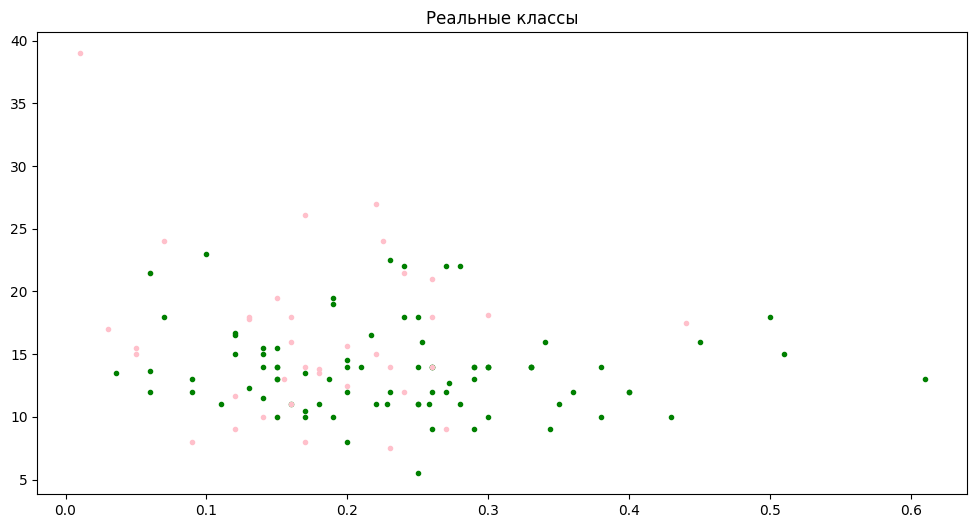

In [7]:
colors = ['green', 'pink']
X=df_echo.values[:,[4,7]]
Y = df_echo.values[:,[1]]
# Создать холст
plt.figure(figsize=(12,6))
plt.title('Реальные классы')
Y = df_echo.values[:,[1]]
i=0
while i < len(Y):
    # Отображение точек выборки
    color = colors[Y[i][0]]
    plt.scatter(X[i, 0], X[i, 1], c=color, marker='.')
    i+=1
plt.show()

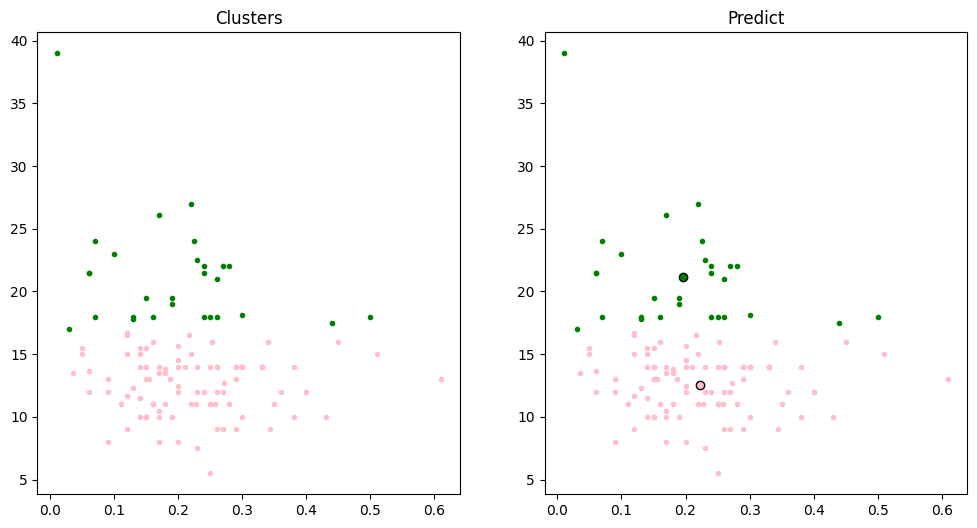

In [14]:
# Модель прогнозирующей кластеризации
pre_y = model.predict(df_main)
colors = ['green', 'pink']
Y = df_echo.values[:,[1]]
# Создать холст
plt.figure(figsize=(12,6))
titles = ['Clusters', 'Predict']
for j, y_ in enumerate([model.labels_, pre_y]):
    plt.subplot(1,2, j+1)
    plt.title(titles[j])
    # Циклическое чтение категории
    for i in range(n_clusters):
        # Найти тот же индекс
        index_sets = np.where(y_ == i)
        # Разделите данные того же класса на подмножество кластеризации
        cluster = X[index_sets]
        # Отображение точек выборки
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')
        if j==1:          
        # Кластерный центр
            plt.plot(centers[i][0], centers[i][1], 'o',markerfacecolor=colors[i],markeredgecolor='k', markersize=6)
plt.savefig('xx.png')
plt.show()

6. Посчитаем суммы квадратов расстояний от каждого объекта до его центра

In [10]:
def dist(A, B):
      r=np.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)
      return r

m = len(X)
k = len(centers)
 
  # матрица расстояний от каждой точки до каждого центра
distances = np.zeros((m, k))
for i in range(m):
    for j in range(k):
        distances[i, j] = dist(centers[j], X[i])

In [11]:
sum_cluster_0 = 0 
sum_cluster_1 = 0

i=0
while i < len(labels):
    if labels[i] == 0:
        sum_cluster_0 += distances[i][0]**2
    else:
        sum_cluster_1 += distances[i][1]**2
    i += 1

In [12]:
print(sum_cluster_0)
print(sum_cluster_1)

531.5634919642861
503.4305155744679
